In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as  mimg

In [3]:
import os
import glob

# Declare raw data path

In [4]:
train_dir = "tun_kun/tun_kun/training"
test_dir =  "tun_kun/tun_kun/test"

In [5]:
data_path = os.path.join(train_dir, 'day', '*')
data_path

'tun_kun/tun_kun/training\\day\\*'

In [6]:
data = glob.glob(data_path)

# Data Loading

In [7]:
def data_load (path):
    images = []
    times = ['day', 'night']
    for i in times:
        for file in glob.glob(os.path.join(path,i,"*")):
            image = cv.imread(file)
            # appending images in RGB format
            images.append((cv.cvtColor(image,cv.COLOR_BGR2RGB), i))
    return images       

In [8]:
train_images = data_load (train_dir)

In [8]:
len(train_images)

240

# Showing some images using plt.subplots

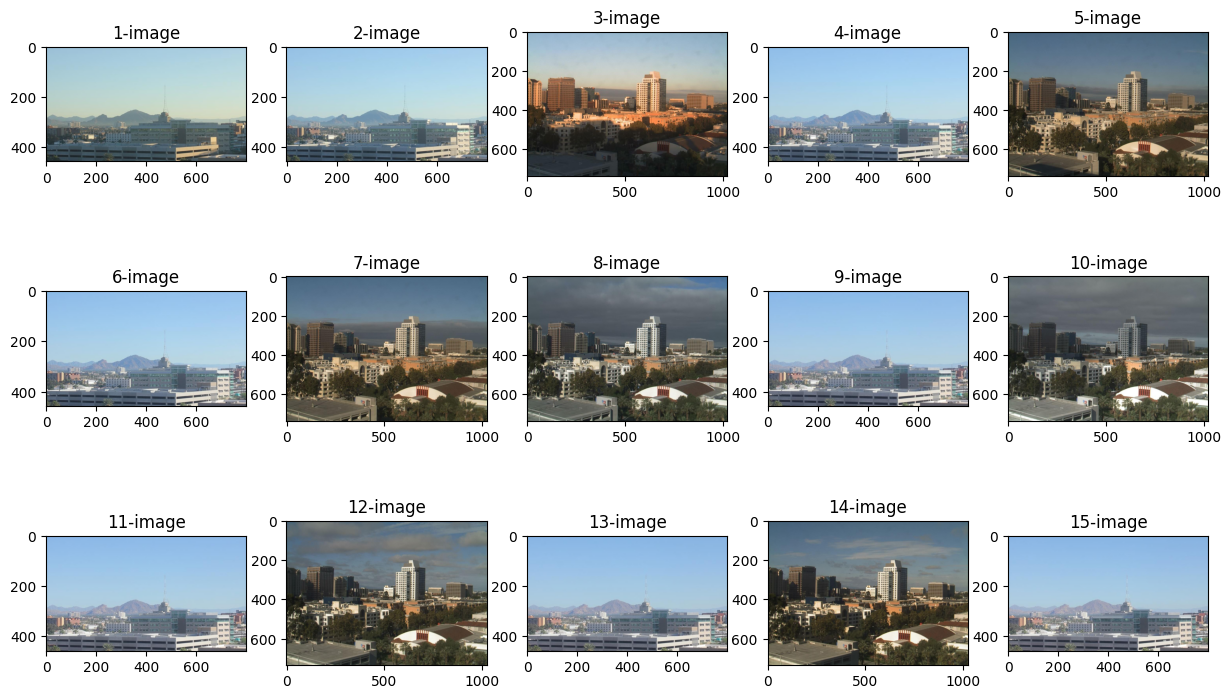

In [13]:
fig,axes = plt.subplots(3,5,figsize=(15,9))

x = 0
for i in range(3):
    for j in range(5):
        axes[i][j].set_title(f"{x + 1}-image")
        axes[i][j].imshow(train_images[x][0])
        x+=1
plt.show()

# Data Preprocessing

- Resizing images

In [9]:
# Doing ressearch shape of images to find a common one.
shapes = []
for img, time_shift in train_images:
    shapes.append(img.shape)
print(shapes)

[(458, 800, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (458, 800, 3), (737, 1024, 3), (737, 1024, 3), (372, 640, 3), (469, 640, 3), (591, 800, 3), (469, 640, 3), (593, 800, 3), (372, 640, 3), (469, 640, 3), (469, 640, 3), (593, 800, 3), (700, 1280, 3), (372, 640, 3), (700, 1280, 3), (469, 640, 3), (700, 1280, 3), (700, 1280, 3), (700, 1280, 3), (469, 640, 3), (700, 1280, 3), (593, 800, 3), (372, 640, 3), (700, 1280, 3), (469, 640, 3), (700, 1280, 3), (700, 1280, 3), (700, 1280, 3), (593, 800, 3), (700, 1280, 3), (372, 640, 3), (700, 1280, 3), (469, 640, 3), (700, 1280, 3), (700, 1280, 3), (700, 1280, 3), (469, 640, 3), (700, 128

In [11]:
from scipy import stats as st

In [12]:
# Finding a common shape(size)
st.mode(shapes)

C:\Users\윤정윤\AppData\Local\Temp\ipykernel_7936\1718597747.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  st.mode(shapes)


ModeResult(mode=array([[469, 640,   3]]), count=array([[ 41,  86, 240]]))

- !!! common size - ModeResult(mode=array(**[[469, 640,   3]]**), count=array([[ 41,  86, 240]]))

In [13]:
def reshape(image):
    re_image = cv.resize(image,(640, 469))
    return re_image

In [14]:
def encode_time (time_shift):
    if time_shift == 'day':
        time_shift = 1
    else:
        time_shift = 0
    return time_shift

In [15]:
def preprocess (images):
    image_data = []
    for image, time_shift in  images:
        image_data.append((reshape(image),encode_time(time_shift)))
    return image_data

In [16]:
prepr_images = preprocess(train_images)

In [17]:
prepr_images[233][0].shape

(469, 640, 3)

# Showing up reshaped images

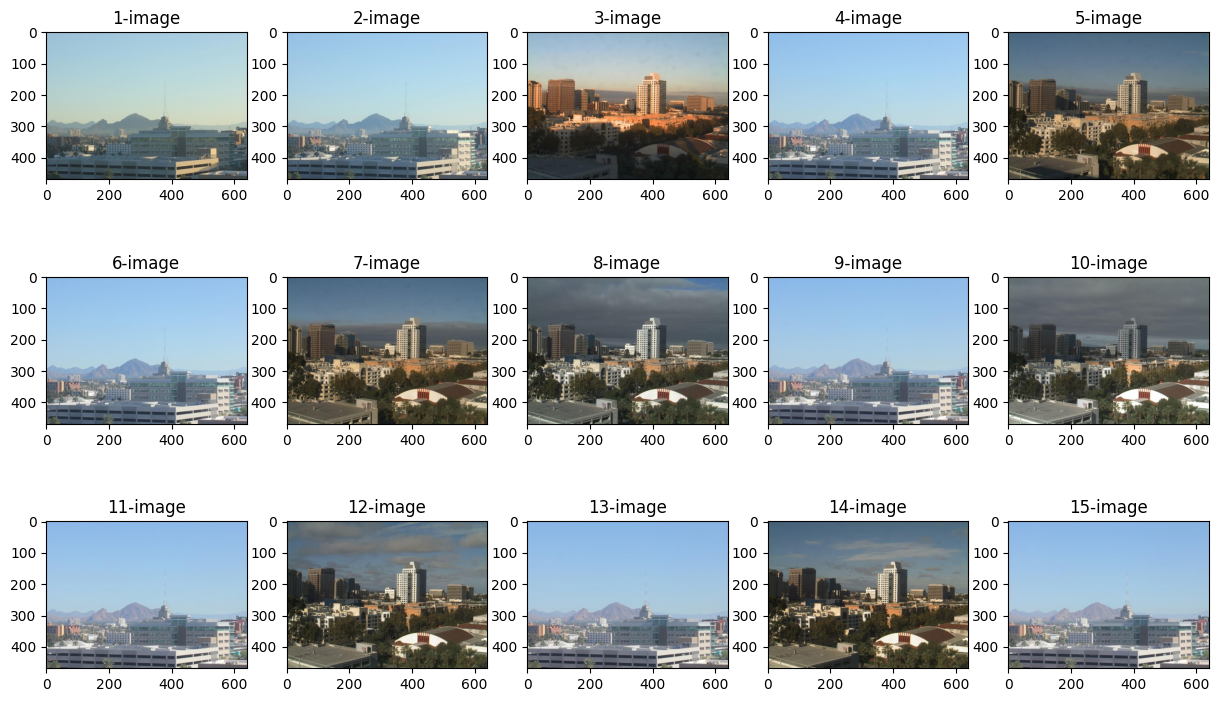

In [29]:
fig,axes = plt.subplots(3,5,figsize=(15,9))

x = 0
for i in range(3):
    for j in range(5):
        axes[i][j].set_title(f"{x + 1}-image")
        axes[i][j].imshow(prepr_images[x][0])
        x+=1
plt.show()

# Converting RGB to HSV

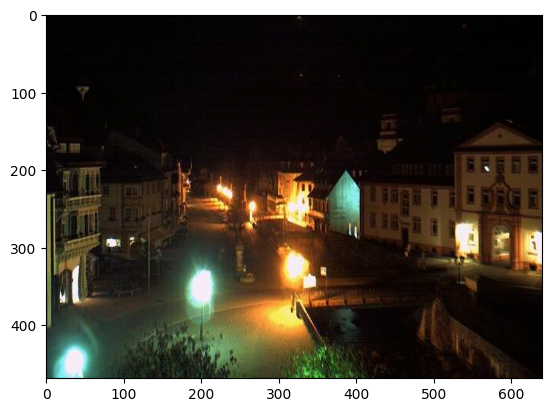

In [18]:
# printing RGB foto
image = prepr_images[133][0]
plt.imshow(image)
plt.show()

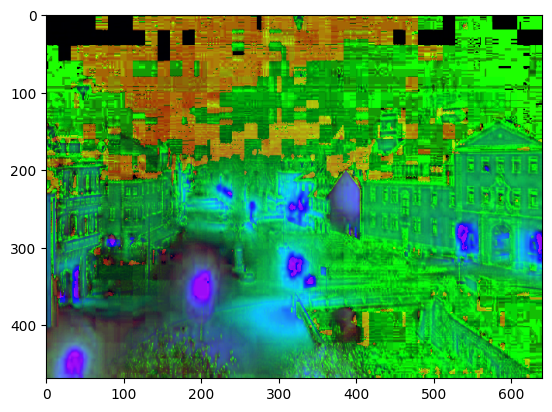

In [20]:
# Printing HSV foto|
image = prepr_images[133][0]
image = cv.cvtColor(image,cv.COLOR_RGB2HSV)
plt.imshow(image)
plt.show()

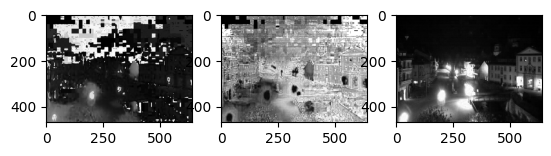

In [22]:
# Printing images based on 3 different values (Hue, Saturation and Value)
hue = image[:,:,0]
saturation = image[:,:,1]
value = image[:,:,2]
plt.subplot(1,3,1)
plt.imshow(hue,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(saturation,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(value,cmap="gray")
plt.show()

# in next steps, just 'Value' is used.

In [23]:
# Taking only Value value of HSV image
def convert2HSV (images):
    HSV_images = []
    for img, time_shift in images:
        image = cv.cvtColor(img,cv.COLOR_RGB2HSV)
        value = image[:, :, 2] 
        HSV_images.append((value, time_shift))
    return HSV_images

In [24]:
HSV_images = convert2HSV(prepr_images)

In [25]:
len(HSV_images)

240

In [29]:
# tuple is returned.
HSV_images[0]

(array([[218, 218, 217, ..., 228, 228, 229],
        [218, 218, 217, ..., 231, 232, 232],
        [218, 218, 217, ..., 228, 229, 229],
        ...,
        [ 43,  46,  46, ...,  75,  75,  75],
        [ 44,  46,  47, ...,  76,  78,  75],
        [ 44,  46,  47, ...,  76,  78,  75]], dtype=uint8),
 1)

In [28]:
HSV_images[0][0]

array([[218, 218, 217, ..., 228, 228, 229],
       [218, 218, 217, ..., 231, 232, 232],
       [218, 218, 217, ..., 228, 229, 229],
       ...,
       [ 43,  46,  46, ...,  75,  75,  75],
       [ 44,  46,  47, ...,  76,  78,  75],
       [ 44,  46,  47, ...,  76,  78,  75]], dtype=uint8)

In [47]:
HSV_images[0][1]

1

In [48]:
# width
len(HSV_images[0][0])

469

In [30]:
# hieght
len(HSV_images[0][0][0])

640

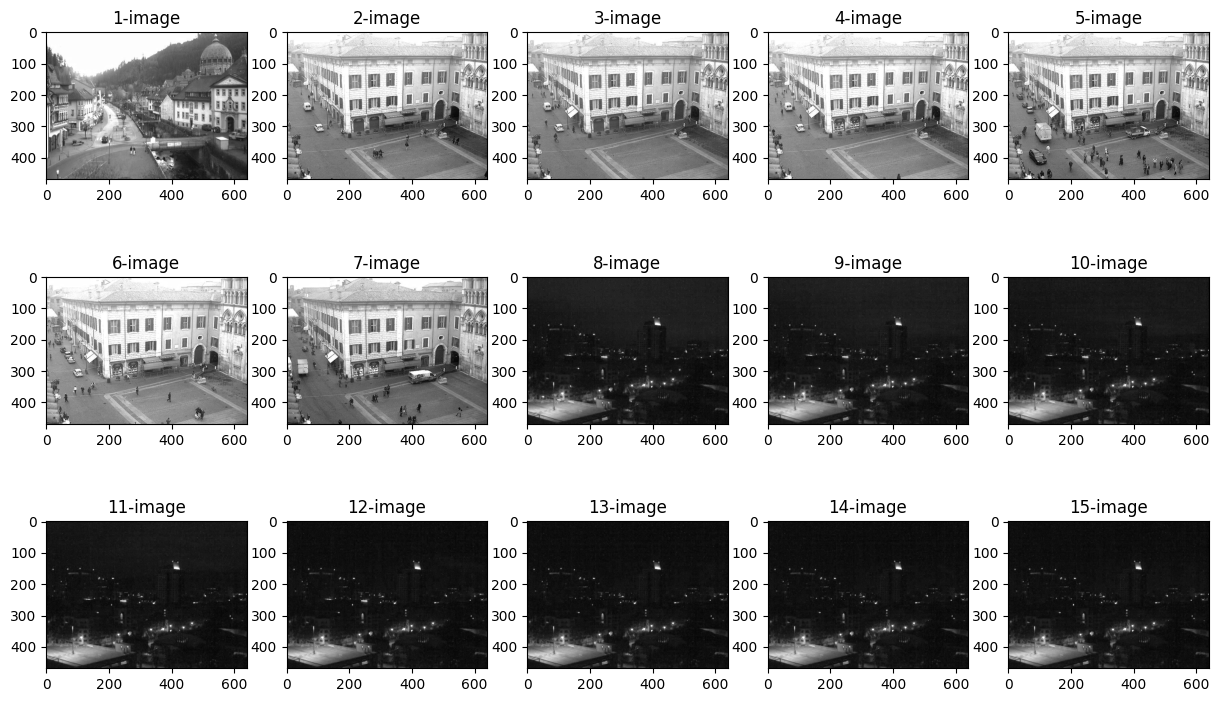

In [31]:
# Ploting HSV(only Value) images
fig,axes = plt.subplots(3,5,figsize=(15,9))

x = 0
for i in range(3):
    for j in range(5):
        axes[i][j].set_title(f"{x + 1}-image")
        axes[i][j].imshow(HSV_images[x+ 113][0],cmap = 'gray')
        x+=1
plt.show()

# Determing sum of pixels for each image (day and night base differently)

In [75]:
train_sum_pixel_day = np.array([np.sum(image) for image, time_shift in HSV_images if time_shift == 1])
train_sum_pixel_night = np.array([np.sum(image) for image, time_shift in HSV_images if time_shift == 0])

In [36]:
train_sum_pixel_day

array([52557324, 57902711, 39669006, 59955249, 33011172, 60037284,
       33668672, 31014895, 59460133, 31292985, 59267415, 31675078,
       58562843, 32549763, 58668211, 32318434, 59078500, 57411776,
       33518757, 54549391, 33111294, 56340679, 32736410, 56516944,
       33099649, 56918728, 32230393, 57491583, 31703944, 31034300,
       43684606, 49202813, 48100115, 37140220, 47424776, 45722415,
       47268238, 31271108, 46615758, 38963690, 41680026, 38911074,
       44881277, 38931869, 38782179, 38430307, 33429720, 38394681,
       46229009, 42331884, 37760384, 46607912, 38025638, 38411442,
       38809358, 49387373, 38535832, 43126578, 39544155, 44689825,
       39308911, 38870396, 38359742, 32786776, 38594373, 41451282,
       32094728, 41073078, 33730963, 46292003, 38153234, 29448213,
       47138173, 42899000, 28416692, 47650350, 43244354, 32053907,
       47792267, 42782747, 33078339, 47961948, 30644159, 34563982,
       40026049, 36127536, 41104429, 34937380, 39285099, 33938

In [37]:
train_sum_pixel_night

array([10130250,  9905005,  9146361,  8827096,  7821055,  7696125,
        7686538,  7718943,  7738797,  7703023,  8342063, 14193826,
       14539661, 14504994,  7763334, 14625704,  2473102,  8309004,
       35900071,  2547843,  4139047,  7718561, 33122732,  2507935,
        4126662,  7735727, 32860051,  2449840,  4322428, 32713728,
        4000561,  4363167, 33990115,  4194992, 34312512, 33875187,
       34483510, 34438717, 33917685,  8373049, 34332779,  8723960,
       34117146,  8084241, 33465223, 33056654, 21504577, 32854084,
        6347331, 21672429, 32950011,  7574943, 21608795, 32566799,
        7354905, 22009974,  7303173, 21778553,  7423243,  6873639,
       10793797, 29841006, 10854855, 29633444, 29696825, 30765321,
       29617071, 29787043, 29725323, 29803544, 10565227, 29775360,
       29696724, 30525508, 29726776, 29714955, 29754705, 29856584,
       11797730, 29889355, 29948212, 30883031, 29742370, 29821407,
       29613655, 11269402, 29117360, 26541187, 28585594, 29089

# Determining special values of train_sum_pixel_day & train_sum_pixel_night

In [114]:
day_info = {
    'min_value': train_sum_pixel_day.min(),
    'mean_value': train_sum_pixel_day.mean(),
    'max_value': train_sum_pixel_day.max()   
}

In [115]:
day_info

{'min_value': 28416692,
 'mean_value': 41227624.791666664,
 'max_value': 60037284}

In [116]:
night_info = {
    'min_value': train_sum_pixel_night.min(),
    'mean_value': train_sum_pixel_night.mean(),
    'max_value': train_sum_pixel_night.max()   
}

In [117]:
night_info

{'min_value': 2449840, 'mean_value': 20766935.95, 'max_value': 35900071}

# Determining standart div for each image (day and night base)

In [94]:
train_std_pixel_day = np.array([np.std(image) for image, time_shift in HSV_images if time_shift == 1 and train_sum_pixel_day.min() <np.sum(image)<= train_sum_pixel_night.max() ])
train_std_pixel_night = np.array([np.std(image) for image, time_shift in HSV_images if time_shift == 0 and train_sum_pixel_day.min() <np.sum(image)<= train_sum_pixel_night.max()])

In [95]:
train_std_pixel_day

array([44.60705483, 45.17150172, 42.65023401, 41.70726657, 46.84728086,
       49.88369731, 50.22037008, 51.88823118, 51.37777462, 51.39999272,
       52.38547371, 52.19479014, 52.41127374, 53.68852477, 67.30121899,
       70.28106213, 64.06080751, 64.16796488, 63.33747501, 64.15997419,
       64.05259284, 61.02763954, 55.78843963, 62.03267627, 65.59168345,
       69.7661771 , 64.32872373, 72.66901992, 55.65115228, 53.58854174,
       61.24617962, 55.13493432, 49.79042308, 55.62497507, 53.62590697,
       35.01933208])

In [96]:
train_std_pixel_night

array([41.13701269, 50.35340037, 50.94185086, 52.06036493, 52.22613855,
       51.6691401 , 53.09804012, 52.45860119, 52.62180818, 53.27247142,
       51.79437462, 51.99419577, 52.84950709, 53.535721  , 53.7555308 ,
       53.71486925, 54.15188771, 68.72323069, 53.4364151 , 53.448127  ,
       64.74479701, 53.38204304, 53.66765245, 53.56973669, 53.62776823,
       53.45818307, 53.55364512, 64.22527627, 53.58650233, 53.64078899,
       53.73253704, 53.81767581, 53.86789366, 53.89227856, 65.56522091,
       53.61518203, 53.70032355, 53.42053217, 69.54580289, 69.51929746,
       87.39663803, 70.46570227, 68.95968771, 72.77245256, 89.75269428,
       73.66465834, 72.84844053, 73.04039669, 73.5780927 ])

# Determining special values of train_std_pixel_day & train_std_pixel_night

In [110]:
day_std_info = {
    'min_value': train_std_pixel_day.min(),
    'mean_value': train_std_pixel_day.mean(),
    'max_value': train_std_pixel_day.max()   
}

In [111]:
day_std_info

{'min_value': 35.01933208063028,
 'mean_value': 55.96334351777432,
 'max_value': 72.66901992098629}

In [112]:
night_std_info = {
    'min_value': train_std_pixel_night.min(),
    'mean_value': train_std_pixel_night.mean(),
    'max_value': train_std_pixel_night.max()   
}

In [113]:
night_std_info

{'min_value': 41.13701268838895,
 'mean_value': 58.73172628212142,
 'max_value': 89.75269427663268}

# !!! No big difference between STDs of  day and night data !!!

# Visual comparing two results in barchart

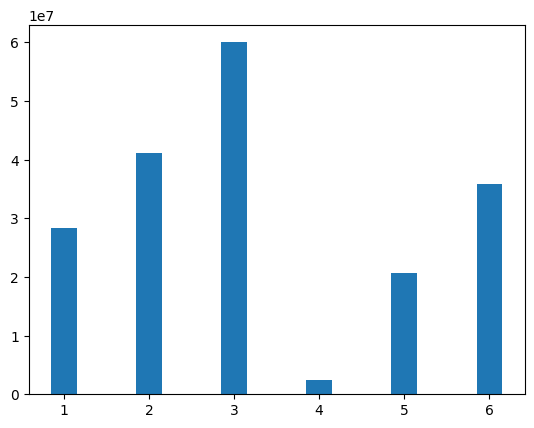

In [42]:
x = [1,2,3,4,5,6]
y = [day_info['min_value'], day_info['mean_value'], day_info['max_value'],
    night_info['min_value'], night_info['mean_value'], night_info['max_value']]
plt.bar(x,y,width=0.3)
plt.show()

In [79]:
np.percentile(train_sum_pixel_day,31.5)

36023992.16

# It is difficult to get a model. Because min of day data is smaller than night's max

In [65]:
HSV_images[74][0].shape

(469, 640)

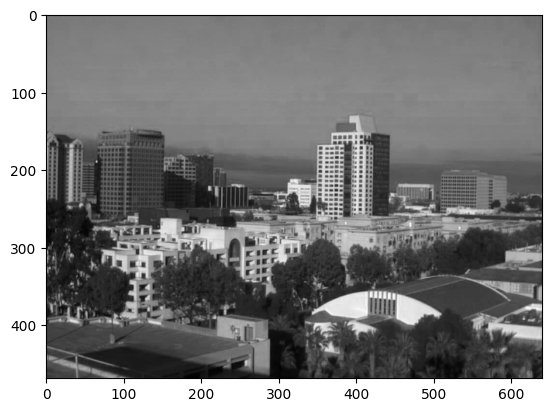

In [103]:
plt.imshow(HSV_images[4][0],cmap='gray')
plt.show()

In [64]:
HSV_images[74][0]

array([[184, 157, 160, ..., 173, 173, 173],
       [183, 157, 160, ..., 173, 173, 173],
       [183, 156, 159, ..., 173, 173, 173],
       ...,
       [ 42,  29,  23, ...,  33,  35,  36],
       [ 45,  32,  24, ...,  31,  33,  35],
       [ 48,  34,  25, ...,  29,  30,  31]], dtype=uint8)

In [104]:
np.sum(HSV_images[4][0])

33011172

In [105]:
np.std(HSV_images[4][0])

44.60705482500789

In [73]:
np.mean(HSV_images[74][0])

94.67181503198294

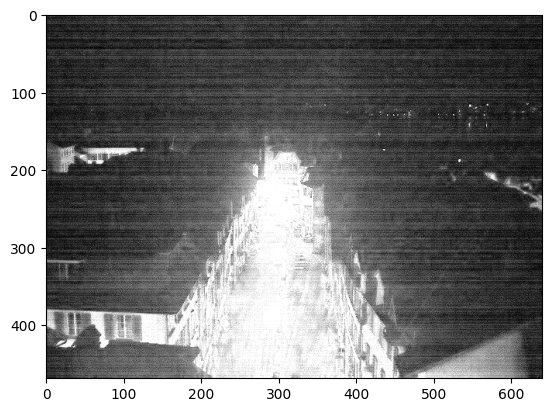

In [71]:
plt.imshow(HSV_images[237][0],cmap='gray')
plt.show()

In [70]:
HSV_images[237][0]

array([[31, 50, 40, ...,  8, 25,  8],
       [43, 18, 39, ..., 33, 25,  8],
       [24, 73, 66, ..., 24, 60, 32],
       ...,
       [69, 31, 58, ..., 98, 17, 50],
       [17, 72, 62, ..., 16, 38, 18],
       [14, 25,  8, ..., 20, 33, 29]], dtype=uint8)

In [68]:
np.sum(HSV_images[237][0])

28828671

In [69]:
np.std(HSV_images[237][0])

73.04039669429221

In [72]:
np.mean(HSV_images[237][0])

96.04434634861407

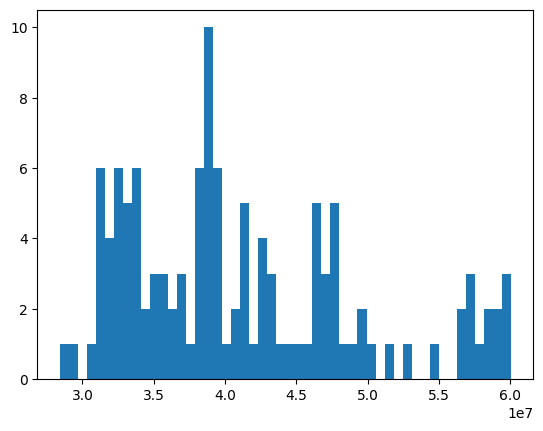

In [106]:
# Histogramm of day data
plt.hist(train_sum_pixel_day, 50)
plt.show()

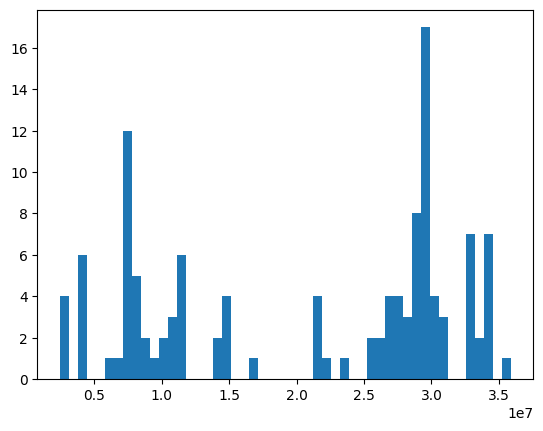

In [107]:
# Histogramm of night data
plt.hist(train_sum_pixel_night, 50)
plt.show()

# Model selection (picking up the boundary line)

In [119]:
bound_line = night_info['max_value']

In [120]:
bound_line

35900071

# Testing test data

In [123]:
# Loading test data
test_images = data_load (test_dir)

In [124]:
# Preprocessing data
prepr_test_images = preprocess(test_images)

In [125]:
# Converting image format into HSV format (Value only)
HSV_test_images = convert2HSV(prepr_test_images)

In [133]:
len(HSV_test_images)

160

In [129]:
# Checking for day
HSV_test_images[0][0].sum() > bound_line

True

In [131]:
# Checking for night
HSV_test_images[150][0].sum() > bound_line

False

# Visually check

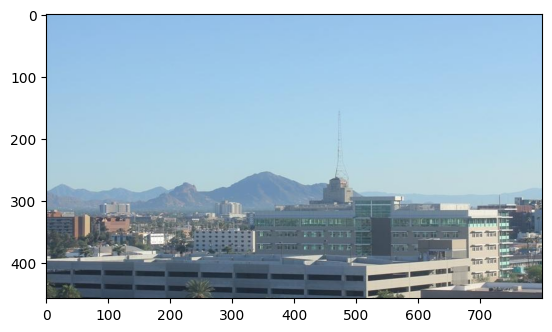

In [126]:
plt.imshow(test_images[0][0])
plt.show()

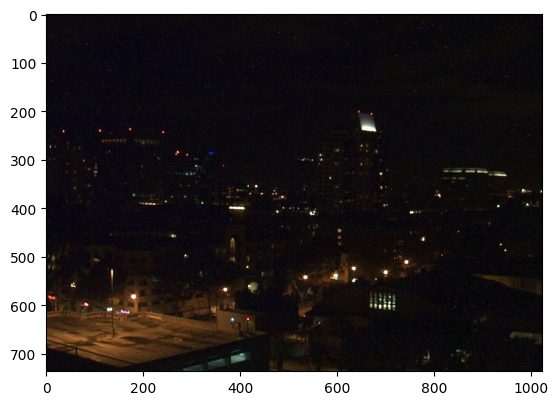

In [132]:
plt.imshow(test_images[150][0])
plt.show()

# Validation step.

In [134]:
import os
import glob

In [135]:
valid_dir = "validation_samples/"

In [136]:
data_path = os.path.join(valid_dir, 'day', '*')
data_path

'validation_samples/day\\*'

In [137]:
data = glob.glob(data_path)
data

['validation_samples/day\\download (1).jpg',
 'validation_samples/day\\download (2).jpg',
 'validation_samples/day\\download (3).jpg',
 'validation_samples/day\\download (4).jpg',
 'validation_samples/day\\download.jpg',
 'validation_samples/day\\Drone-Daytime-560x460.jpg',
 'validation_samples/day\\Silicon Valley Tech Day Tour from San Francisco.jpg']

In [139]:
valid_images = data_load (valid_dir)

In [140]:
prepr_valid_images = preprocess(valid_images)

In [143]:
HSV_valid_images = convert2HSV(prepr_valid_images)

In [144]:
len(HSV_valid_images)

15

In [146]:
HSV_valid_images[1][0].sum() > bound_line

True

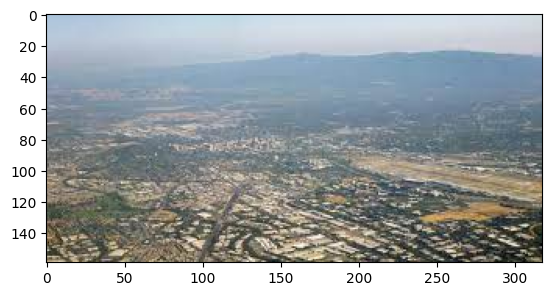

In [147]:
plt.imshow(valid_images[1][0])
plt.show()

In [148]:
HSV_valid_images[13][0].sum() > bound_line

False

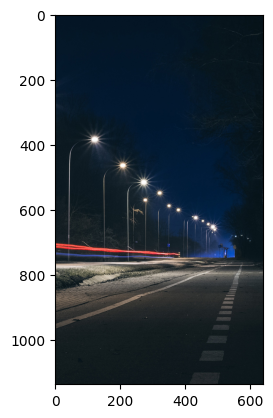

In [150]:
plt.imshow(valid_images[13][0])
plt.show()

# !!! Validation is successful 